In [6]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import json
import requests
import time
from us import states

In [ ]:
#testing 
!pwd

In [7]:

#load data
csv_path = "Resources/NutritionPhysicalActivityandObesity.csv"
nutrition_data = pd.read_csv(csv_path)

# drop unesscary columns and fix labels
nutrition_data = nutrition_data.drop(columns=['Data_Value_Unit',
                                              'Stratification1',
                                             ])
renamecols_df = nutrition_data.rename(columns={"LocationAbbr":"StateAbbr",
                           "LocationDesc":"State",
                            "Age(years)":"Age"})

#renamecols is df before narrowing age demographic
renamecols_df.head()

,StateAbbr,State,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age,GeoLocation
0,WY,Wyoming,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,48.5,48.5,NaN,NaN,32.3,64.9,69.0,NaN,"(43.235541343, -108.109830353)"
1,DC,District of Columbia,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,31.6,31.6,NaN,NaN,24.0,40.4,243.0,NaN,"(38.890371385, -77.031961127)"
2,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,35.2,35.2,NaN,NaN,30.7,40.0,598.0,25 - 34,"(32.840571122, -86.631860762)"
3,US,National,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,27.9,27.9,NaN,NaN,27.6,28.3,266452.0,NaN,NaN
4,US,National,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,16.9,16.9,NaN,NaN,16.0,17.8,20923.0,18 - 24,NaN


In [8]:
#trim age column to include only desired age demographic
agedem_df = renamecols_df.loc[(renamecols_df["Age"] == "18 - 24")
                               |(renamecols_df["Age"] == "25 - 34")
                               |(renamecols_df["Age"] == "35 - 44")
                               |(renamecols_df["Age"] == "45 - 54"),:]
#age is df with focus age deomographic
#while working on indivudal projects we should create and save a df with the needed data
agedem_df.tail()

#define dataframe for veggie and fruit analysis
#define dataframe for excercise/behavior analysis
#define dataframe for obesity rates for gen x and gen y

,StateAbbr,State,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age,GeoLocation
62991,VA,Virginia,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,Value,34.2,34.2,NaN,NaN,28.5,40.4,399.0,18 - 24,"(37.542680674, -78.457890463)"
62994,AZ,Arizona,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,27.7,27.7,NaN,NaN,20.7,36.1,212.0,18 - 24,"(34.86597028, -111.763811277)"
63000,TN,Tennessee,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,39.3,39.3,NaN,NaN,35.0,43.7,769.0,45 - 54,"(35.68094058, -85.774490914)"
63014,UT,Utah,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,Value,22.6,22.6,NaN,NaN,20.5,24.8,2006.0,35 - 44,"(39.360700171, -111.587130635)"
63019,AZ,Arizona,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,21.4,21.4,NaN,NaN,15.2,29.2,408.0,35 - 44,"(34.86597028, -111.763811277)"


In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a dataframe grouping by the 'Sex' column 
age_groups = agedem_df.groupby('Age') 

# Create a dataframe counting the number of data points for each age 
age_groups_count = pd.DataFrame(age_groups['Age'].count()) 

# View the groupby dataframe 
age_groups_count

,Age
Age,
18 - 24,2249
25 - 34,2249
35 - 44,2249
45 - 54,2249


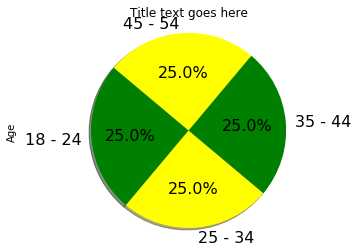

In [30]:
# Create a pie chart based off of the group series from before 
age_groups_count.plot(kind='pie', y='Age', \
                        title="Title text goes here",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["green","yellow"],legend =False) 

# Make the axis equal to avoid plotting an egg shaped pie chart 
plt.axis("equal") 
#plt.savefig("figures/PandaPieChart.png") 
plt.show()

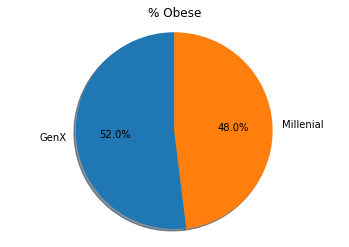

In [82]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise
labels = ['GenX', 'Millenial']
sizes = [GenX_Weight_mean, GenM_Weight_mean]


# Explode out the 'Chemical' pie piece by offsetting it a greater amount
#explode = (0.1, 0.4)

fig, ax = plt.subplots()
ax.pie(sizes,
       #explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('% Obese')


plt.show()

In [65]:
GenX_Data = agedem_df[(agedem_df["Age"] == "35 - 44") | 
                        (agedem_df["Age"] == "45 - 54")]
GenX_Data.head()

,StateAbbr,State,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age,GeoLocation
30,NY,New York,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.7,29.7,NaN,NaN,26.7,32.8,1331.0,35 - 44,"(42.827001032, -75.543970427)"
32,MT,Montana,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,Value,35.5,35.5,NaN,NaN,31.7,39.5,988.0,35 - 44,"(47.066528972, -109.424420645)"
50,SD,South Dakota,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,38.2,38.2,NaN,NaN,32.6,44.1,732.0,35 - 44,"(44.353130053, -100.373530637)"
64,GU,Guam,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,27.0,27.0,NaN,NaN,21.7,32.9,489.0,35 - 44,"(13.444304, 144.793731)"
65,GU,Guam,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,31.3,31.3,NaN,NaN,25.9,37.3,513.0,45 - 54,"(13.444304, 144.793731)"


In [66]:
GenM_Data = agedem_df[(agedem_df["Age"] == "18 - 24") | 
                        (agedem_df["Age"] == "25 - 34")]
GenM_Data.head()

,StateAbbr,State,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age,GeoLocation
2,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,35.2,35.2,NaN,NaN,30.7,40.0,598.0,25 - 34,"(32.840571122, -86.631860762)"
4,US,National,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,16.9,16.9,NaN,NaN,16.0,17.8,20923.0,18 - 24,NaN
5,US,National,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,22.1,22.1,NaN,NaN,21.4,22.8,45883.0,25 - 34,NaN
41,ME,Maine,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,Value,42.2,42.2,NaN,NaN,36.9,47.7,381.0,18 - 24,"(45.254228894001, -68.985031336)"
43,AK,Alaska,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,12.8,12.8,NaN,NaN,9.8,16.6,660.0,25 - 34,"(64.845079957001, -147.722059036)"


In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a dataframe grouping by the 'Sex' column 
GenM_Weight_Data = GenM_Data.groupby('Question') 

# Create a dataframe counting the number of data points for each age 
GenM_Weight_Data_count = pd.DataFrame(GenM_Weight_Data['Question'].count()) 

# View the groupby dataframe 
GenM_Weight_Data_count

#GenM_Weight_Data = GenM_Data.groupby('Topic')
#GenM_Weight_Data.head()

,Topic
Topic,
Fruits and Vegetables - Behavior,216
Obesity / Weight Status,1720
Physical Activity - Behavior,2562


In [74]:
GenM_Weight_df = GenM_Data[(GenM_Data["Question"] == "Percent of adults aged 18 years and older who have obesity")]
GenM_Weight_df.head()

,StateAbbr,State,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age,GeoLocation
2,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,35.2,35.2,NaN,NaN,30.7,40.0,598.0,25 - 34,"(32.840571122, -86.631860762)"
103,NM,New Mexico,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.2,33.2,NaN,NaN,28.6,38.1,743.0,25 - 34,"(34.520880952, -106.240580985)"
717,NY,New York,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,12.7,12.7,NaN,NaN,10.3,15.5,1659.0,18 - 24,"(42.827001032, -75.543970427)"
738,MS,Mississippi,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,19.9,19.9,NaN,NaN,14.6,26.5,240.0,18 - 24,"(32.745510099, -89.538030825)"
743,AR,Arkansas,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.4,33.4,NaN,NaN,27.0,40.4,283.0,25 - 34,"(34.748650124, -92.274490743)"


In [76]:
GenM_Weight_mean = GenM_Data["Data_Value"].mean()
GenM_Weight_mean

28.9606616003576

In [75]:
GenX_Weight_df = GenX_Data[(GenX_Data["Question"] == "Percent of adults aged 18 years and older who have obesity")]
GenX_Weight_df.head()

,StateAbbr,State,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age,GeoLocation
30,NY,New York,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.7,29.7,NaN,NaN,26.7,32.8,1331.0,35 - 44,"(42.827001032, -75.543970427)"
87,WA,Washington,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.3,33.3,NaN,NaN,30.5,36.2,1727.0,45 - 54,"(47.522278629, -120.47001079)"
261,MS,Mississippi,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,37.4,37.4,NaN,NaN,34.1,40.8,1249.0,45 - 54,"(32.745510099, -89.538030825)"
381,IA,Iowa,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,37.9,37.9,NaN,NaN,33.4,42.5,597.0,35 - 44,"(42.469400913, -93.816490556)"
548,MO,Missouri,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,37.7,37.7,NaN,NaN,33.8,41.7,1079.0,45 - 54,"(38.635790776, -92.566300053)"


In [77]:
GenX_Weight_mean = GenX_Data["Data_Value"].mean()
GenX_Weight_mean

31.330129637907913

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM Questions
Question = GenX_Data.groupby('Question') 
Question.head()

Question_mean = Question["Data_Value"].mean()
Question_median = Question["Data_Value"].median()
Question_variance = Question["Data_Value"].var()
Question_std = Question["Data_Value"].std()
Question_sem = Question["Data_Value"].sem()

GenX_Q_Summary = pd.DataFrame({"Mean":Question_mean, "Median":Question_median, "Variance":Question_variance, "Standard Deviation":Question_std, "SEM":Question_sem})
GenX_Q_Summary

,Mean,Median,Variance,Standard Deviation,SEM
Question,,,,,
Percent of adults aged 18 years and older who have an overweight classification,36.400234,36.55,7.151719,2.674270,0.091405
Percent of adults aged 18 years and older who have obesity,33.831075,33.65,24.455478,4.945248,0.169025
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),49.279953,49.50,37.619290,6.133457,0.297867
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,19.154717,19.30,13.055959,3.613303,0.175478
Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),28.919575,28.60,23.880869,4.886806,0.237324
Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,27.937028,28.70,19.571699,4.423991,0.214848
Percent of adults who engage in no leisure-time physical activity,24.619555,23.95,35.290907,5.940615,0.203284
Percent of adults who report consuming fruit less than one time daily,38.048113,37.40,39.737187,6.303744,0.612274
Percent of adults who report consuming vegetables less than one time daily,17.653774,16.90,26.351462,5.133367,0.498597


In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM Question
Question = GenM_Data.groupby('Question') 
Question.head()

Question_mean = Question["Data_Value"].mean()
Question_median = Question["Data_Value"].median()
Question_variance = Question["Data_Value"].var()
Question_std = Question["Data_Value"].std()
Question_sem = Question["Data_Value"].sem()

GenM_Q_Summary = pd.DataFrame({"Mean":Question_mean, "Median":Question_median, "Variance":Question_variance, "Standard Deviation":Question_std, "SEM":Question_sem})
GenM_Q_Summary

,Mean,Median,Variance,Standard Deviation,SEM
Question,,,,,
Percent of adults aged 18 years and older who have an overweight classification,29.584346,29.90,22.129018,4.704149,0.160785
Percent of adults aged 18 years and older who have obesity,22.333762,22.30,49.875525,7.062261,0.241383
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),52.068632,51.70,34.400692,5.865210,0.284840
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,26.219811,25.85,27.378992,5.232494,0.254112
Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),29.982075,29.60,25.940955,5.093226,0.247349
Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,40.142217,39.85,44.155826,6.644985,0.322709
Percent of adults who engage in no leisure-time physical activity,18.443326,17.80,23.063560,4.802454,0.164337
Percent of adults who report consuming fruit less than one time daily,39.167925,38.30,28.274390,5.317367,0.516468
Percent of adults who report consuming vegetables less than one time daily,21.685849,20.50,32.624465,5.711783,0.554777


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM Questions
# This method produces everything in a single groupby function.
age_stats = agedem_df.groupby('Age') 
age_stats.head()

age_stats_mean = age_stats["Data_Value"].mean()
age_stats_median = age_stats["Data_Value"].median()
age_stats_variance = age_stats["Data_Value"].var()
age_stats_std = age_stats["Data_Value"].std()
age_stats_sem = age_stats["Data_Value"].sem()

S_Summary = pd.DataFrame({"Mean":age_stats_mean, "Median":age_stats_median, "Variance":age_stats_variance, "Standard Deviation":age_stats_std, "SEM":age_stats_sem})
S_Summary

,Mean,Median,Variance,Standard Deviation,SEM
Age,,,,,
18 - 24,28.137237,25.8,166.681989,12.910538,0.272968
25 - 34,29.784086,29.3,89.342582,9.452121,0.199846
35 - 44,30.881985,30.6,86.401844,9.295259,0.196530
45 - 54,31.778274,32.0,92.587712,9.622251,0.203443


In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM Questions
# This method produces everything in a single groupby function.

Question = agedem_df.groupby('Question') 
Question.head()

Question_mean = Question["Data_Value"].mean()
Question_median = Question["Data_Value"].median()
Question_variance = Question["Data_Value"].var()
Question_std = Question["Data_Value"].std()
Question_sem = Question["Data_Value"].sem()

Q_Summary = pd.DataFrame({"Mean":Question_mean, "Median":Question_median, "Variance":Question_variance, "Standard Deviation":Question_std, "SEM":Question_sem})
Q_Summary

,Mean,Median,Variance,Standard Deviation,SEM
Question,,,,,
Percent of adults aged 18 years and older who have an overweight classification,32.992290,34.20,26.252682,5.123737,0.123833
Percent of adults aged 18 years and older who have obesity,28.082418,29.40,70.210147,8.379150,0.202511
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),50.674292,50.60,37.913955,6.157431,0.211447
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,22.687264,21.90,32.687228,5.717275,0.196332
Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),29.450825,29.05,25.164061,5.016379,0.172263
Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,34.039623,32.55,69.111769,8.313349,0.285482
Percent of adults who engage in no leisure-time physical activity,21.531440,20.85,38.702180,6.221108,0.150530
Percent of adults who report consuming fruit less than one time daily,38.608019,38.10,34.159604,5.844622,0.401410
Percent of adults who report consuming vegetables less than one time daily,19.669811,18.55,33.431881,5.782031,0.397112


In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a dataframe grouping by the 'State' column 
state_groups = agedem_df.groupby('State') 

# Create a dataframe counting the number of data points for each age 
state_groups_count = pd.DataFrame(state_groups['State'].count()) 

# View the groupby dataframe 
state_groups_count.head()

,State
State,
Alabama,168
Alaska,168
Arizona,168
Arkansas,168
California,168


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM Questions
# This method produces everything in a single groupby function.
state_stats = agedem_df.groupby('State') 
state_stats.head()

state_stats_mean = state_stats["Data_Value"].mean()
state_stats_median = state_stats["Data_Value"].median()
state_stats_variance = state_stats["Data_Value"].var()
state_stats_std = state_stats["Data_Value"].std()
state_stats_sem = state_stats["Data_Value"].sem()

St_Summary = pd.DataFrame({"Mean":state_stats_mean, "Median":state_stats_median, "Variance":state_stats_variance, "Standard Deviation":state_stats_std, "SEM":state_stats_sem})
St_Summary.head()

,Mean,Median,Variance,Standard Deviation,SEM
State,,,,,
Alabama,30.355952,29.60,81.916132,9.050753,0.698281
Alaska,31.995238,31.55,155.763570,12.480528,0.962894
Arizona,30.464286,29.45,99.166382,9.958232,0.768294
Arkansas,30.934524,30.70,98.596645,9.929584,0.766084
California,30.279762,28.10,137.434558,11.723249,0.904468


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterData = merged_df[(merged_df["Drug Regimen"] == "Capomulin")]
scatterData = scatterData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupByData = scatterData.groupby(["Mouse ID","Weight (g)"])
scatterDataDF = groupByData["Tumor Volume (mm3)"].mean()#.to_frame()
scatterDataDF = scatterDataDF.reset_index()
scatterDataDF.head()

In [ ]:
plt.figure()
scatterDataDF.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume")
# plt.xlim(10, 25)
# plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()